# Анализ А/В-теста для интернет-магазина

В исследовании нам необходимо приоритизировать подготовленные отделом маркетинга гипотезы для увеличения выручки. Также нам нужно провести А/В-тест и принять решение по полученным результатам: стоит ли останавливать тест или продолжить его проведение. 

## Часть 1. Приоритизация гипотез 

Отдел маркетинга интернет-магазина сформулировал 9 гипотез для увеличения выручки с параметрами `Reach` (Охват), `Impact` (Влияние), `Confidence` (Уверенность) и `Effort` (Усилия).
<br>Импортируем библиотеки и загрузим данные, сохраним их в переменной `data`:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 400)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Определим наиболее перспективные гипотезы. Сперва используем метод `ICE`:

In [3]:
data['ice_score'] = (data['Impact'] * data['Confidence']) / data['Efforts']
data[['Hypothesis', 'ice_score']].sort_values(by='ice_score', ascending = False)

,Hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


С помощью метода `ICE` установили, что наиболее перспективные гипотезы с индексами 8, 0 и 7, то есть: 
* гипотеза 8: «Запустить акцию, дающую скидку на товар в день рождения»
* гипотеза 0: «Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»
* гипотеза 7: «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»

Выясним, какие результаты покажет метод `RICE`:

In [4]:
data['rice_score'] = (data['Reach'] * data['Confidence'] * data['Impact']) / data['Efforts']
data[['Hypothesis', 'rice_score']].sort_values(by='rice_score', ascending = False)

,Hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Самую высокую оценку по методу `RICE` получила гипотеза с индексом 7, вдвое меньшие оценки у гипотез с индексами 2, 0 и 6:

* гипотеза 7: «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»
* гипотеза 2: «Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа»
* гипотеза 0: «Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»
* гипотеза 6: «Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию»

Построим также точечный график, который покажет гипотезы с наибольшим суммарным рейтингом по обоим методам:

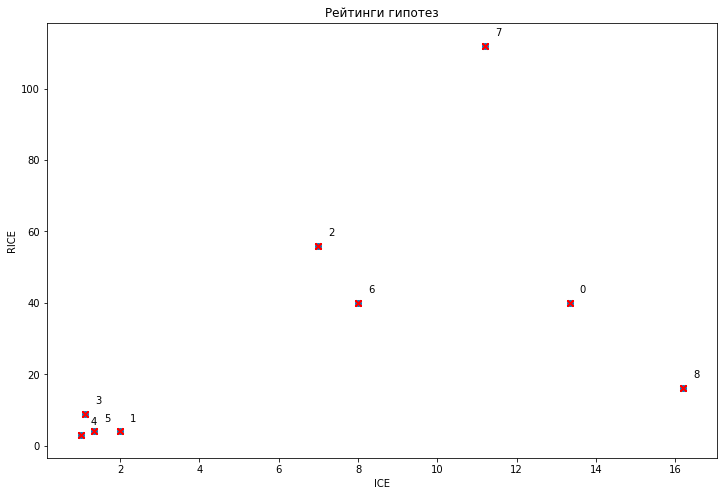

In [5]:
x = data['ice_score'].values
y = data['rice_score'].values
types = data.reset_index()['Hypothesis'].index

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, y)

ax.set_xlabel('ICE')
ax.set_ylabel('RICE')
ax.set_title('Рейтинги гипотез')

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

**Вывод**

Метод `ICE` показал, что наиболее перспективная гипотеза с индексом 8 — «Запустить акцию, дающую скидку на товар в день рождения». Но ее показатель Reach равен 1, то есть это изменение затронет наименьшее число пользователей. Хотя показатели Impact и Confidence одни из самых высоких — по 9 баллов.
<br>В то время как у перспективной гипотезы по методу `RICE` («Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок», индекс 7) показатель охвата пользователей самый высокий — 10. При этом показатели Impact и Confidence у этой гипотезы на высоком уровне (7 и 8, соответственно), и средняя оценка Efforts, равная 5. 

Если учитывать число пользователей, на которых повлияет изменение, наиболее перспективная гипотеза — «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»

## Часть 2. Анализ A/B-теста

Проанализируем А/В-тест и примем решение, стоит ли его продолжать, или полученных результатов будет достаточно для его остановки. 

### Открытие и предобработка данных

Сохраним данные в двух переменных: 
* `orders` — с информацией о заказах в каждой из групп, 
* `visitors` — с информацией о пользователях в каждой из групп.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.sample(5, random_state=1)

,transactionId,visitorId,date,revenue,group
886,51443164,4278982564,2019-08-05,24744,A
1093,3894437543,276558944,2019-08-12,5050,A
801,504373597,2604012846,2019-08-05,890,B
189,4189935502,1648269707,2019-08-17,290,B
808,2344401705,366673373,2019-08-05,1460,A


In [8]:
visitors.head(7)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем даты в таблицах к нужному формату:

In [11]:
orders['date'] = orders['date'].astype('datetime64')
visitors['date'] = visitors['date'].astype('datetime64')

Выясним, сколько всего уникальных пользователей было в каждой из групп:

In [12]:
#в переменных сохраним id пользователей групп А и В
group_a = orders.query('group == "A"')['visitorId']
group_b = orders.query('group == "B"')['visitorId']

print('Количество уникальных покупателей в группе А: {}'.format(group_a.nunique()))
print('Количество уникальных покупателей в группе B: {}'.format(group_b.nunique()))

Количество уникальных покупателей в группе А: 503
Количество уникальных покупателей в группе B: 586


Во вторую группу попало прибл. на 80 пользователей больше, чем в группу А. 
<br>Вычислим относительное различие количества пользователей:

In [13]:
#поделим число пользователей в группах и вычтем единицу 
abs(round(503/586-1, 2))

0.14

Относительное различие числа пользователей составило 14 %. Это может стать проблемой при анализе — количество пользователей в группах не должно так сильно различаться. 

Выясним, были ли пользователи, которые по ошибке во время теста попали и в группу А, и в группу В:

In [14]:
#сохраним пользователей, которые попали в обе группы 
err = orders.query('visitorId in @group_a and visitorId in @group_b')
err.sort_values(by='visitorId').head(10)

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
1102,1941707234,199603092,2019-08-12,6438,A
1009,2670069237,232979603,2019-08-31,2640,B
1013,83566152,232979603,2019-08-31,60,A
590,3702128013,237748145,2019-08-20,1290,A


Видим, что в таблице `orders` действительно есть пользователи, попавшие в обе группы. Вычислим, сколько их всего:

In [15]:
len(err.agg({'visitorId':'unique'}))

58

Мы обнаружили 58 пользователей, попавших в обе группы. Мы не можем удалить этих пользователей или поменять им группы (например, определить для них группу, учитывая дату их первого заказа), потому что у нас есть вторая таблица `visitors`, в которой на каждую дату указано число пользователей в группах А и В. Удалив данные из первой таблицы, мы исказим данные во второй. Все, что нам остается, это сообщить разработчикам об этой ошибке, чтобы в будущем она не повторялась. 

**Вывод**

В ходе предобработки данных мы выяснили, что число пользователей в группе А значительно меньше, чем в группе В. Также мы нашли <br>58 пользователей, которые по ошибке во время теста попали и в группу А, и в группу В. Мы приняли решение оставить все как есть и провести анализ по текущим данным. Но мы сообщим разработчикам об этой проблеме.

### График кумулятивной выручки по группам

Построим график кумулятивной выручки по датам и группам.

Создадим массив уникальных пар «дата + группа»:

In [16]:
date_group = orders[['date', 'group']].drop_duplicates()
date_group.head(6)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B


Соберем агрегированные кумулятивные по дням данные по заказам. 
<br>В переменной сохраним заказы, совершенные не позднее даты из `date_group`, группа при этом должна быть равна группе из `date_group`. Затем вычислим максимальные значения даты и группы, количество уникальных пользователей и заказов, а также сумму средних чеков: 

In [17]:
orders_aggr = date_group.apply(
    lambda x: orders[
        np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "visitorId": pd.Series.nunique,
            "transactionId": pd.Series.nunique,
            "revenue": "sum",
        }
    ),
    axis=1,
).sort_values(by=["date", "group"])

orders_aggr.head(6)

,date,group,visitorId,transactionId,revenue
55,2019-08-01,A,20,24,148579
66,2019-08-01,B,20,21,101217
175,2019-08-02,A,38,44,242401
173,2019-08-02,B,43,45,266748
291,2019-08-03,A,62,68,354874
310,2019-08-03,B,59,61,380996


Таким же образом получим кумулятивные данные о посетителях, снова определим максимальные дату и группу, а также общее число посетителей: 

In [18]:
visitors_aggr = date_group.apply(
    lambda x: visitors[
        np.logical_and(visitors["date"] <= x["date"], visitors["group"] == x["group"])
    ].agg({"date": "max", "group": "max", "visitors": "sum"}),
    axis=1,
).sort_values(by=["date", "group"])

visitors_aggr.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


Объединим полученные кумулятивные данные в одной таблице: 

In [19]:
cumulative_data = orders_aggr.merge(visitors_aggr, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']
cumulative_data.head(6)

,date,group,buyers,orders,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845
5,2019-08-03,B,59,61,380996,1803


Сохраним в двух переменных кумулятивные данные о выручке по каждой из групп:

In [20]:
cumulative_revenueA = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'revenue']]
cumulative_revenueB = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'revenue']]
cumulative_revenueA.head()

,date,orders,revenue
0,2019-08-01,24,148579
2,2019-08-02,44,242401
4,2019-08-03,68,354874
6,2019-08-04,84,425699
8,2019-08-05,109,549917


In [21]:
cumulative_revenueB.head()

,date,orders,revenue
1,2019-08-01,21,101217
3,2019-08-02,45,266748
5,2019-08-03,61,380996
7,2019-08-04,78,489567
9,2019-08-05,101,581995


Построим график кумулятивной выручки по группам:

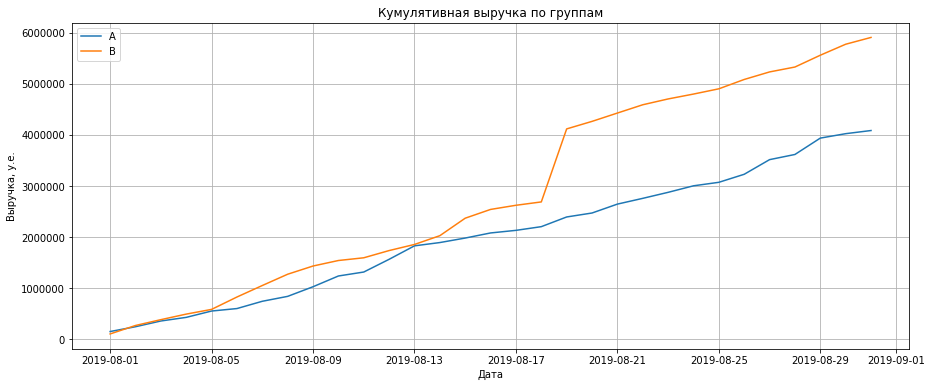

In [22]:
plt.figure(figsize=(15, 6))
plt.grid(True)
#график для группы А 
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')
#график для группы В
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, у.е.')
plt.show()

**Вывод**

Выручка в группе А повышается равномерно в течение всего теста, и до 17 августа в обеих группах наблюдалось то же самое. Но в группе В <br>18 и 19 августа видим резкое увеличение выручки. Это можно объяснить либо ростом числа заказов, либо совершением очень дорогих покупок. Эти данные необходимо проверить на аномалии и выбросы. В конце теста в группе В кумулятивная выручка выше прибл. на 2 миллиона. 

### График кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам: разделим выручку на количество заказов:

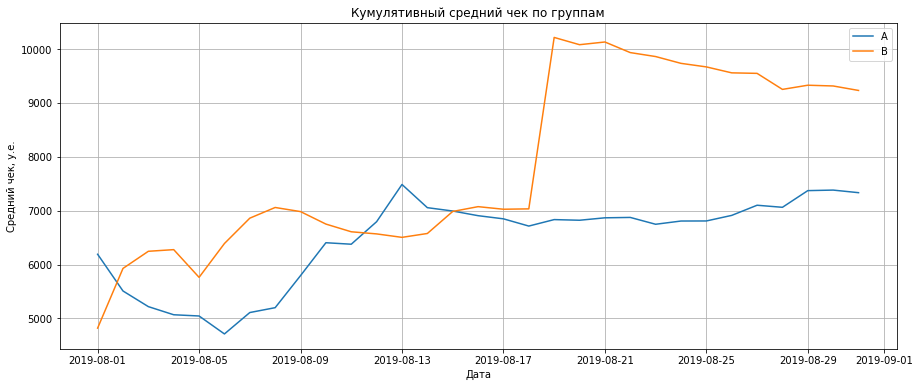

In [23]:
plt.figure(figsize=(15, 6))
plt.grid(True)
#средний чек для группы А
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'] / cumulative_revenueA['orders'], label='A')
#средний чек для группы В
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'] / cumulative_revenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, у.е.')
plt.show()

**Вывод**

Величина среднего чека в обеих группах распределена неравномерно: наблюдаем резкие скачки в первой половине теста. С 18 августа в группе В снова видим резкое увеличение значений — вероятно, это также связано с крупными заказами. После скачка последовало небольшое уменьшение среднего чека. Но по итогу к концу теста средний чек в группе В гораздо больше, чем в группе А. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

Объединим две таблицы с кумулятивными данными по выручке:

In [24]:
cumulative_revenue_merged = cumulative_revenueA.merge(
    cumulative_revenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

cumulative_revenue_merged.head()

,date,ordersA,revenueA,ordersB,revenueB
0,2019-08-01,24,148579,21,101217
1,2019-08-02,44,242401,45,266748
2,2019-08-03,68,354874,61,380996
3,2019-08-04,84,425699,78,489567
4,2019-08-05,109,549917,101,581995


Получили единую таблицу с данными о заказах и выручке для каждой из групп.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

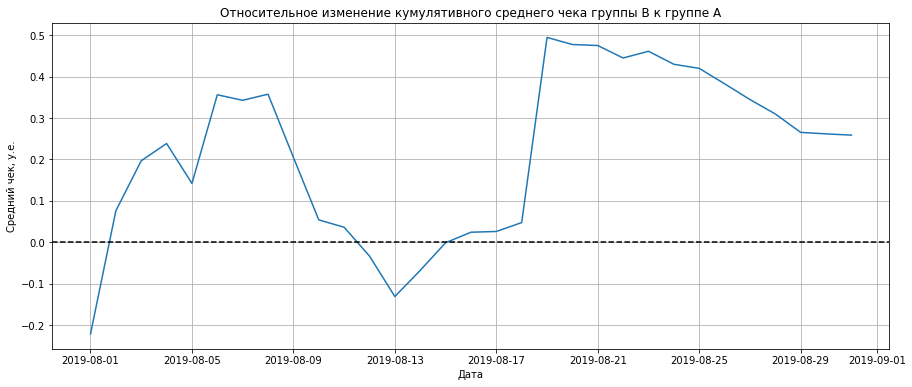

In [25]:
plt.figure(figsize=(15, 6))
plt.grid(True)
#величину среднего чека группы В разделим на средний чек в группе А и вычтем единицу
plt.plot(cumulative_revenue_merged['date'], 
         (cumulative_revenue_merged['revenueB']/cumulative_revenue_merged['ordersB'])/
         (cumulative_revenue_merged['revenueA']/cumulative_revenue_merged['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек, у.е.')
#добавим горизонтальную линию 
plt.axhline(y=0, linestyle='--', color='black')
plt.show()

**Вывод**

На графике снова видим резкие перепады величины среднего чека — это опять же говорит о наличии выбросов. Теперь скачки наблюдаем не только после 18 августа, но и в первой половине теста. После 18 августа и до конца проведения теста средний чек группы В по отношению к первой группе постепенно уменьшался, но все равно был больше, чем в группе А. 

### График кумулятивной конверсии по группам

Вычислим кумулятивную конверсию: 

In [26]:
#создадим новый столбец с конверсией
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head(6)

,date,group,buyers,orders,revenue,visitors,conversion
0,2019-08-01,A,20,24,148579,719,0.033380
1,2019-08-01,B,20,21,101217,713,0.029453
2,2019-08-02,A,38,44,242401,1338,0.032885
3,2019-08-02,B,43,45,266748,1294,0.034776
4,2019-08-03,A,62,68,354874,1845,0.036856
5,2019-08-03,B,59,61,380996,1803,0.033833


Разделим полученную таблицу на две, для каждой из групп:

In [27]:
#данные с конверсией для группы А
cumulative_dataA = cumulative_data[cumulative_data['group'] == 'A']
cumulative_dataA.head()

,date,group,buyers,orders,revenue,visitors,conversion
0,2019-08-01,A,20,24,148579,719,0.033380
2,2019-08-02,A,38,44,242401,1338,0.032885
4,2019-08-03,A,62,68,354874,1845,0.036856
6,2019-08-04,A,77,84,425699,2562,0.032787
8,2019-08-05,A,100,109,549917,3318,0.032851


In [28]:
#данные с конверсией для группы А
cumulative_dataB = cumulative_data[cumulative_data['group'] == 'B']
cumulative_dataB.head()

,date,group,buyers,orders,revenue,visitors,conversion
1,2019-08-01,B,20,21,101217,713,0.029453
3,2019-08-02,B,43,45,266748,1294,0.034776
5,2019-08-03,B,59,61,380996,1803,0.033833
7,2019-08-04,B,75,78,489567,2573,0.030315
9,2019-08-05,B,98,101,581995,3280,0.030793


Построим график кумулятивной конверсии по группам:

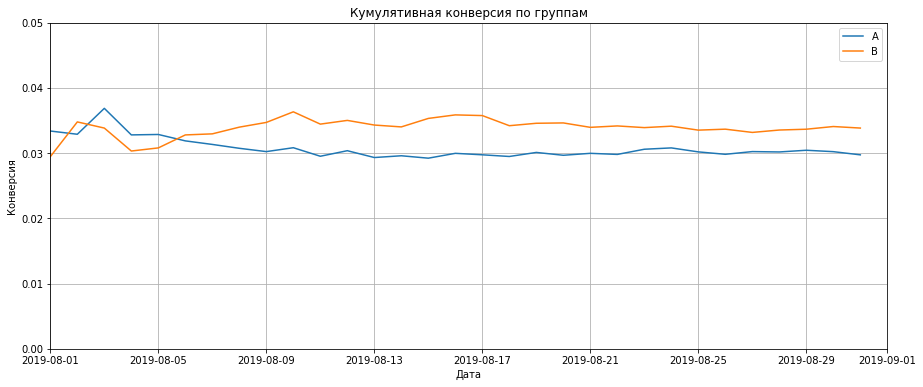

In [29]:
plt.figure(figsize=(15, 6))
plt.grid(True)
#график конверсии для группы А
plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='A')
#график конверсии для группы В
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
#зададим масштаб осей
plt.axis(['2019-08-01', '2019-09-01', 0, 0.05])
plt.show()

**Вывод**

В начале теста видим колебания в величине конверсии в обеих группах. Спустя приблизительно неделю конверсия в обеих группах выровнялась. Конверсия группы В с 6 августа и до конца теста превосходит значение в группе А. Судя по графику, пользователи в группе В чаще совершали покупки.  

### График относительного изменения кумулятивной конверсии группы B к группе A

Соединим таблицы по конверсиям для групп А и В в одну:

In [30]:
cumulative_conversion_merged = cumulative_dataA.merge(
    cumulative_dataB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

cumulative_conversion_merged.head()

,date,groupA,buyersA,ordersA,revenueA,visitorsA,conversionA,groupB,buyersB,ordersB,revenueB,visitorsB,conversionB
0,2019-08-01,A,20,24,148579,719,0.033380,B,20,21,101217,713,0.029453
1,2019-08-02,A,38,44,242401,1338,0.032885,B,43,45,266748,1294,0.034776
2,2019-08-03,A,62,68,354874,1845,0.036856,B,59,61,380996,1803,0.033833
3,2019-08-04,A,77,84,425699,2562,0.032787,B,75,78,489567,2573,0.030315
4,2019-08-05,A,100,109,549917,3318,0.032851,B,98,101,581995,3280,0.030793


Построим график относительного изменения кумулятивной конверсии группы B к группе A:

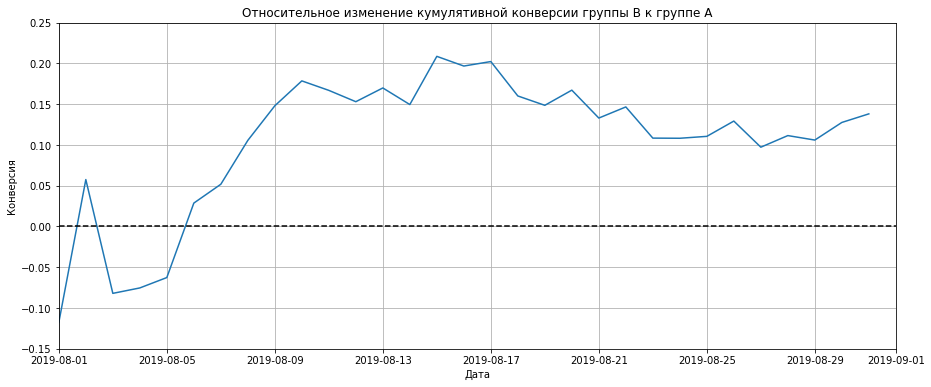

In [31]:
plt.figure(figsize=(15, 6))
plt.grid(True)
plt.plot(
    cumulative_conversion_merged["date"],
    cumulative_conversion_merged["conversionB"]
    / cumulative_conversion_merged["conversionA"]
    - 1,
)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
#зададим масштаб осей
plt.axis(['2019-08-01', '2019-09-01', -0.15, 0.25])
#добавим горизонтальную линию 
plt.axhline(y=0, linestyle='--', color='black')
plt.show()

**Вывод**

В первые 5 дней теста конверсия группы В была ниже, чем в группе А. Но к 6 августа конверсия в группе В начала резко расти и до конца проведения теста ниже нулевой отметки не опускалась. Это говорит нам о том, что покупатели в группе В гораздо активнее оформляли заказы, чем в группе А. 

### Точечный график количества заказов по пользователям

Выясним, сколько заказов оформляют пользователи: 

In [32]:
orders_by_users = orders.groupby('visitorId').agg({'transactionId':'nunique', 'group':'first'}).reset_index()
orders_by_users.columns = ['user_id', 'orders_count', 'group']
orders_by_users.sort_values(by='orders_count', ascending=False).head(7)

,user_id,orders_count,group
1023,4256040402,11,B
591,2458001652,11,A
569,2378935119,9,A
487,2038680547,8,B
44,199603092,5,A
744,3062433592,5,B
55,237748145,5,B


Есть покупатели, которые совершали по 5, 8, 9 и 11 заказов за рассматриваемый период. Построим гистрограмму и выясним, какое число заказов на пользователя встречается чаще всего: 

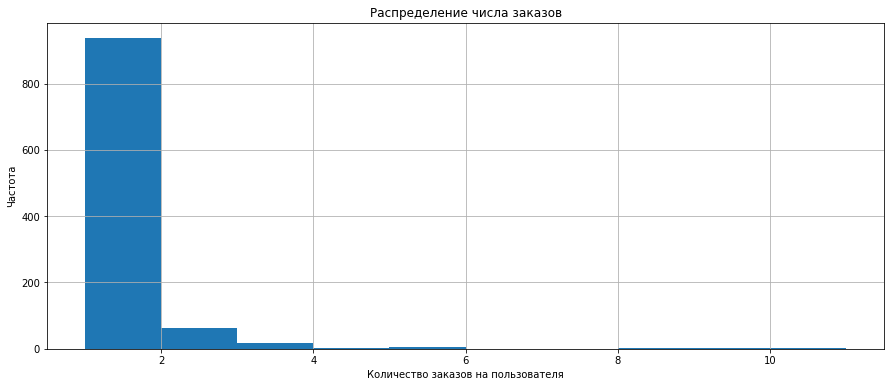

In [33]:
orders_by_users['orders_count'].plot(kind='hist', figsize=(15, 6), title='Распределение числа заказов', grid=True)
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Частота')
plt.show()

Чаще всего пользователь оформляет не более 2 заказов. Гораздо меньше пользователей, совершавших покупки более 4 раз. 
<br>Построим также точечный график количества заказов на пользователя:

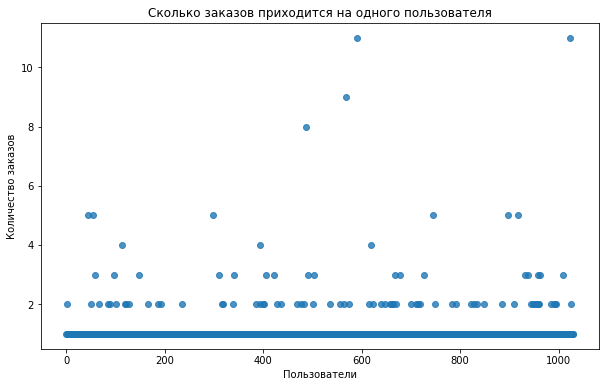

In [34]:
x_val = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(10, 6))
plt.scatter(x_val, orders_by_users['orders_count'], alpha=0.8)
plt.title('Сколько заказов приходится на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Построим еще один точечный график, но теперь пользователей из групп отметим на нем разными цветами:

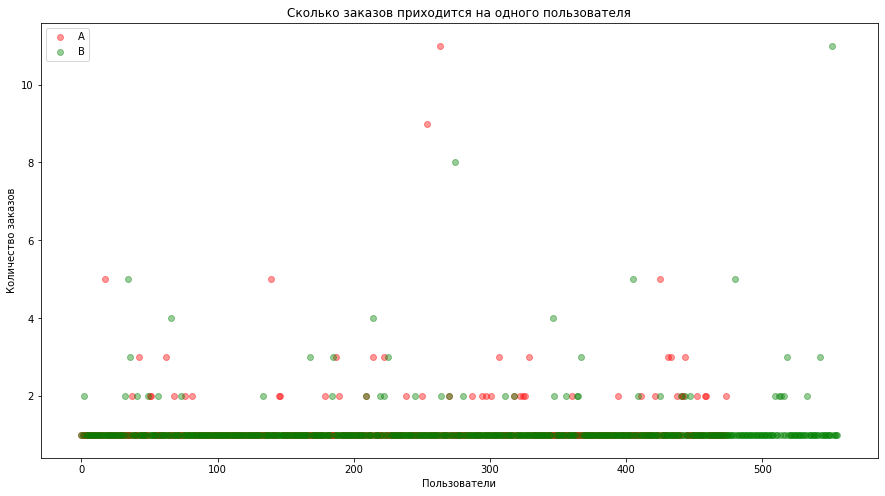

In [35]:
orders_by_usersA = orders_by_users[orders_by_users['group'] == 'A']
orders_by_usersB = orders_by_users[orders_by_users['group'] == 'B']

x_valA = pd.Series(range(0, len(orders_by_usersA)))
x_valB = pd.Series(range(0, len(orders_by_usersB)))
plt.figure(figsize=(15, 8))
plt.scatter(x_valA, orders_by_usersA['orders_count'], alpha=0.4, c='red', label='A')
plt.scatter(x_valB, orders_by_usersB['orders_count'], alpha=0.4, c='green', label='B')
plt.title('Сколько заказов приходится на одного пользователя')
plt.legend()
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

**Вывод**

Чаще всего пользователь оформляет 1–2 заказа. Гораздо реже встречаются покупатели с 4 заказами и более. Причем покупатели с наибольшим числом покупок одинаково встречаются в обеих группах. Нам необходимо определить, какое число заказов можно считать аномальным.

### Определение аномальных пользователей

Выясним, сколько заказов должен был оформить пользователь, чтобы мы посчитали это число аномально большим. 
<br>Посчитаем 95-й и 99-й перцентили:

In [36]:
np.percentile(orders_by_users['orders_count'], [95, 99])

array([2., 4.])

Получили:
* 95-й перцентиль равен 2 заказам на пользователя,
* 99-й перцентиль равен 4 заказам на пользователя.

**Вывод**

Посчитали перцентили и определили, что у 1 % пользователей количество заказов больше или равно 4, и у 5 % пользователей не больше 2 покупок. Посчитаем пользователей с более чем двумя покупками как аномальных. 

### Точечный график стоимостей заказов

Проверим, на какую сумму пользователи чаще всего оформляют заказы. Построим гистограмму и выясним, есть ли в данных выбросы:

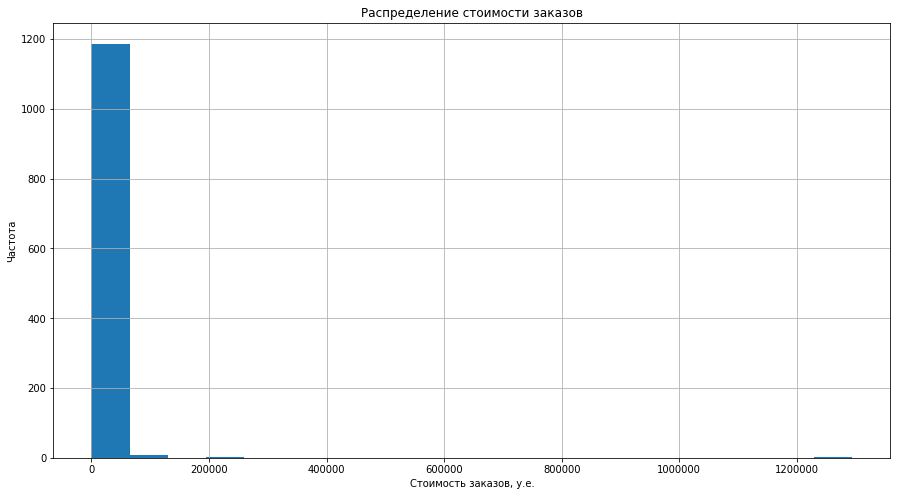

In [37]:
orders['revenue'].plot(kind='hist', figsize=(15, 8), bins=20, title='Распределение стоимости заказов', grid=True)
plt.xlabel('Стоимость заказов, у.е.')
plt.ylabel('Частота')
plt.show()

Чаще всего стоимость заказа в интернет-магазине не превышает прибл. 70 000 у.е. Видим также аномально дорогие заказы — выше 200 тысяч и даже больше больше 1 миллиона. Построим два точечных графика для получения более точных результатов. На первом отобразим все заказы, на втором поставим ограничение по стоимости заказа — не более 150 000 у.е.

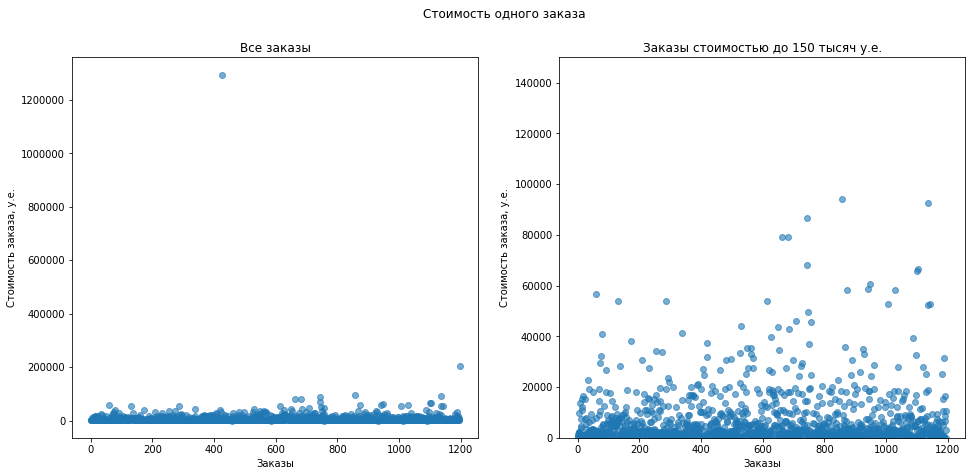

In [38]:
x_val_rev = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(16, 7))

#первый график со всеми заказами
plt.subplot(1, 2, 1)
plt.scatter(x_val_rev, orders['revenue'], alpha=0.6)
plt.title('Все заказы')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа, у.е.')

#второй график с ограничением стоимости - до 150 тысяч
plt.subplot(1, 2, 2)
plt.scatter(x_val_rev, orders['revenue'], alpha=0.6)
plt.title('Заказы стоимостью до 150 тысяч у.е.')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа, у.е.')
plt.ylim(0, 150000)

plt.suptitle('Стоимость одного заказа')
plt.show()

**Вывод**

Чаще всего стоимость заказа не превышает 8 тысяч. По графику можем предварительно определить аномальными такие заказы, стоимость которых превышает прибл. 25 000 у.е. 

### Определение аномальных заказов

Вычислим 95-й и 99-й перцентили, чтобы выяснить, какие заказы мы можем считать аномально дорогими:

In [39]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Результаты:
* 95-й перцентиль стоимости заказов равен 28 000 у.е.;
* 99-й перцентиль стоимости заказов равен 58 233 у.е. 

**Вывод**

Мы получили, стоимость выше 28 тысяч у. е. не более, чем у 5 % заказов. И только не более 1 % заказов дороже 58 233 у.е. 
<br>Аномально дорогими заказами далее будем считать такие, чья стоимость превышает 28 000 у.е. 

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Подготовим данные для расчета статистической значимости различий в конверсии между группами по «сырым» данным. 

Найдем кумулятивное количество заказов и кумулятивную выручку на каждую дату в группе А:

In [40]:
#на каждую дату вычислим число заказов и общую выручку для группы А
daily_ordersA = (
    orders[orders['group'] == 'A'][['date', 'revenue', 'transactionId']]
    .groupby('date', as_index=False)
    .agg({'transactionId':'nunique', 'revenue':'sum'})
)
#переименуем столбцы
daily_ordersA.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']
daily_ordersA.head()

,date,orders_per_dateA,revenue_per_dateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [41]:
#вычислим кумулятивное число заказов и выручку в группе А
ordersA_cumulative = daily_ordersA.apply(
    lambda x: daily_ordersA[daily_ordersA["date"] <= x["date"]].agg(
        {"date": "max", "orders_per_dateA": "sum", "revenue_per_dateA": "sum"}
    ),
    axis=1,
)
#переименуем столбцы 
ordersA_cumulative.columns = ['date', 'cumulative_ordersA', 'cumulative_revenueA']
ordersA_cumulative.head()

,date,cumulative_ordersA,cumulative_revenueA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


Вычислим кумулятивное число заказов и выручку для группы В:

In [42]:
daily_ordersB = (
    orders[orders["group"] == "B"][["date", "revenue", "transactionId"]]
    .groupby("date", as_index=False)
    .agg({"transactionId": "nunique", "revenue": "sum"})
)
daily_ordersB.columns = ["date", "orders_per_dateB", "revenue_per_dateB"]
ordersB_cumulative = daily_ordersB.apply(
    lambda x: daily_ordersB[daily_ordersB["date"] <= x["date"]].agg(
        {"date": "max", "orders_per_dateB": "sum", "revenue_per_dateB": "sum"}
    ),
    axis=1,
)
ordersB_cumulative.columns = ["date", "cumulative_ordersB", "cumulative_revenueB"]
ordersB_cumulative.head()

,date,cumulative_ordersB,cumulative_revenueB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Также найдем кумулятивное количество посетителей на каждую дату, сначала для группы А:

In [43]:
#в переменной сохраним пару "дата + число посетителей" в группе А
daily_visitorsA = visitors[visitors['group'] == 'A'][['date', 'visitors']].reset_index(drop=True)
daily_visitorsA.columns = ['date', 'visitors_per_dateA']
daily_visitorsA.head()

,date,visitors_per_dateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [44]:
#вычислим накопительное количество поситителей на каждую дату в группе А 
visitorsA_cumulative = daily_visitorsA.apply(
    lambda x: daily_visitorsA[daily_visitorsA["date"] <= x["date"]].agg(
        {"date": "max", "visitors_per_dateA": "sum"}
    ),
    axis=1,
)
visitorsA_cumulative.columns = ['date', 'cumulative_visitorsA']
visitorsA_cumulative.head()

,date,cumulative_visitorsA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [45]:
#создадим аналогичную переменную для группы В 
daily_visitorsB = visitors[visitors["group"] == "B"][["date", "visitors"]].reset_index(
    drop=True
)
daily_visitorsB.columns = ["date", "visitors_per_dateB"]
visitorsB_cumulative = daily_visitorsB.apply(
    lambda x: daily_visitorsB[daily_visitorsB["date"] <= x["date"]].agg(
        {"date": "max", "visitors_per_dateB": "sum"}
    ),
    axis=1,
)
visitorsB_cumulative.columns = ["date", "cumulative_visitorsB"]
visitorsB_cumulative.head()

,date,cumulative_visitorsB
0,2019-08-01,713
1,2019-08-02,1294
2,2019-08-03,1803
3,2019-08-04,2573
4,2019-08-05,3280


Теперь соединим полученные переменные в одну таблицу:

In [46]:
df = (
    daily_ordersA.merge(daily_ordersB, left_on='date', right_on='date', how='left')
    .merge(ordersA_cumulative, left_on='date', right_on='date', how='left')
    .merge(ordersB_cumulative, left_on='date', right_on='date', how='left')
    .merge(daily_visitorsA, left_on='date', right_on='date', how='left')
    .merge(daily_visitorsB, left_on='date', right_on='date', how='left')
    .merge(visitorsA_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsB_cumulative, left_on='date', right_on='date', how='left')
)
df.head()

,date,orders_per_dateA,revenue_per_dateA,orders_per_dateB,revenue_per_dateB,cumulative_ordersA,cumulative_revenueA,cumulative_ordersB,cumulative_revenueB,visitors_per_dateA,visitors_per_dateB,cumulative_visitorsA,cumulative_visitorsB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем для каждого пользователя количество его заказов:

In [47]:
#для пользователей из группы А найдем число уникальных заказов
orders_by_usersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
#переименуем столбцы
orders_by_usersA.columns = ['user_id', 'orders']
orders_by_usersA.sample(5, random_state=1)

,user_id,orders
306,2695379936,1
342,2927087541,1
47,393266494,1
67,600964629,1
376,3160565905,1


In [48]:
#создадим такую же таблицу для пользователей из группы В
orders_by_usersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_by_usersB.columns = ['user_id', 'orders']
orders_by_usersB.sample(5, random_state=1)

,user_id,orders
512,3791892006,1
225,1630618580,1
23,179951984,1
451,3261022559,1
242,1728743776,1


Подготовим две выборки по каждой из групп к проверке критерием Манна-Уитни.
<br>Создадим переменные, в которых сохраним список, в котором каждому пользователю будет соответствовать число заказов, в том числе 0 заказов. 

In [49]:
#к списку с числом заказов каждого пользователя прикрепим список с пользователями, которые ничего не заказывали:
#из суммарного числа посетителей в день вычтем количество строк с заказами
#список для группы А
sampleA = pd.concat(
    [
        orders_by_usersA["orders"],
        pd.Series(
            0,
            index=np.arange(
                df["visitors_per_dateA"].sum() - len(orders_by_usersA["orders"])
            ),
            name="orders",
        ),
    ],
    axis=0,
)
sampleA.sample(5, random_state=4)

3087     0
566      0
8        1
8529     0
13206    0
Name: orders, dtype: int64

In [50]:
#создадим такой же список для группы В
sampleB = pd.concat(
    [
        orders_by_usersB["orders"],
        pd.Series(
            0,
            index=np.arange(
                df["visitors_per_dateB"].sum() - len(orders_by_usersB["orders"])
            ),
            name="orders",
        ),
    ],
    axis=0,
)
sampleB.sample(5, random_state=2)

337      1
12225    0
2066     0
12796    0
18138    0
Name: orders, dtype: int64

Теперь мы можем вычислить, как статистически различаются конверсии двух групп по «сырым» данным. 
<br>Сформулируем нулевую гипотезу: «В конверсиях групп А и В нет статистически значимых различий». 
<br>Альтернативная гипотеза: «В конверсиях групп А и В наблюдаемая разница статистически значима».
<br>Критический уровень статистической значимости определим в 5 %.

Применим критерий Манна-Уитни для вычисления *p-value*:

In [51]:
#добавим параметры use_continuity и alternative для проведения двухстороннего анализа
print(
    "p-значение по «сырым» данным: {0:.3f}".format(
        stats.mannwhitneyu(
            sampleA, sampleB, use_continuity=True, alternative="two-sided"
        )[1]
    )
)

p-значение по «сырым» данным: 0.017


Вычислим также относительное различие между конверсиями групп В и А: 

In [52]:
#поделим данные по группе В на данные группы А и вычтем 1 
print('Относительное различие между конверсиями по «сырым» данным: {0:.3f}'.format(sampleB.mean()/sampleA.mean() - 1))

Относительное различие между конверсиями по «сырым» данным: 0.138


**Вывод**

Полученный по «сырым» данным *p-value*, равный 0.017, меньше статистической значимости 5 %, а значит мы можем отвергнуть нулевую гипотезу о том, что статистически конверсии двух групп не различаются: конверсия одной из групп вероятно больше, чем в другой. 
Второй полученный результат говорит о том, что в группе В по «сырым» данным конверсия больше, чем в группе А прибл. на 14 %. 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Вычислим статистическую значимость различий средних чеков групп А и В по «сырым» данным.
<br>Нулевая гипотеза: «В средних чеках нет статистически значимых различий между группами». 
<br>Альтернативная гипотеза: «В средних чеках между группами есть статистически значимая разница».
<br>Уровень статистической значимости также равен 5 %.

In [53]:
#применим критерий Манна-Уитни к выручкам каждой из групп
print(
    "p-значение по «сырым» данным: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[orders["group"] == "A"]["revenue"],
            orders[orders["group"] == "B"]["revenue"],
            use_continuity=True,
            alternative="two-sided",
        )[1]
    )
)

p-значение по «сырым» данным: 0.729


In [54]:
#разделим среднюю выручку группы В на среднее значение по группе А и вычтем 1 
print(
    "Относительное различие между средними чеками по «сырым» данным: {0:.3f}".format(
        orders[orders["group"] == "B"]["revenue"].mean()
        / orders[orders["group"] == "A"]["revenue"].mean()
        - 1
    )
)

Относительное различие между средними чеками по «сырым» данным: 0.259


**Вывод**

Значение *p-value* 0.729, полученное по «сырым» данным, гораздо больше статистической значимости в 5 %, а значит мы не можем отвергнуть нулевую гипотезу: в среднем чеке нет статистически значимых различий между группами. При этом средний чек группы В значительно больше (на 26 %), чем в группе А. Для корректных выводов нам нужно убрать из расчетов выявленные ранее аномальные значения. 

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Ранее мы определили, что аномальными пользователями можно считать тех, кто совершил более двух покупок. Аномально дорогими заказами решили назвать такие, стоимость которых превышает 28 000 у.е.  
<br>Создадим два среза, в которых сохраним пользователей с аномальным числом заказов и аномальной стоимостью покупок: 

In [55]:
#созадим срез с аномальным числом заказов
users_abnormal_orders = pd.concat(
    [
        orders_by_usersA[orders_by_usersA["orders"] > 2]["user_id"],
        orders_by_usersB[orders_by_usersB["orders"] > 2]["user_id"],
    ],
    axis=0,
)

In [56]:
#созадим срез с аномальной стоимостью покупок
users_abnormal_costs = orders[orders['revenue'] > 28000]['visitorId']
#users_abnormal_costs.columns = ['user_id']

In [57]:
#соединим два списка в один
users_abnormal = pd.concat([users_abnormal_orders, users_abnormal_orders], axis=0).drop_duplicates()
users_abnormal

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
456    3908431265
467    3967698036
499    4256040402
37      249864742
68      457167155
360    2587333274
382    2742574263
424    3062433592
501    3717692402
514    3803269165
Name: user_id, dtype: int64

In [58]:
print('Всего аномальных пользователей: {} человек'.format(users_abnormal.count()))

Всего аномальных пользователей: 20 человек


Мы определили 20 аномальных пользователей. Теперь мы можем исключить их из выборки и проверить статистическую значимость различий в конверсии между группами уже по «очищенным» данным.
<br>Создадим обновленные переменные, в которых каждому пользователю будет соответствовать число заказов, но удалим из них данные об аномальных покупателях:

In [59]:
#в новый список не попадут те пользователи, id которых есть в списке users_abnormal
sampleA_filtered = pd.concat(
    [
        orders_by_usersA[
            np.logical_not(orders_by_usersA["user_id"].isin(users_abnormal))
        ]["orders"],
        pd.Series(
            0,
            index=np.arange(
                df["visitors_per_dateA"].sum() - len(orders_by_usersA["orders"])
            ),
            name="orders",
        ),
    ],
    axis=0,
)
sampleA_filtered.sample(5, random_state=4)

5423     0
3105     0
15810    0
13368    0
427      1
Name: orders, dtype: int64

In [60]:
#такой же список для группы В
sampleB_filtered = pd.concat(
    [
        orders_by_usersB[
            np.logical_not(orders_by_usersB["user_id"].isin(users_abnormal))
        ]["orders"],
        pd.Series(
            0,
            index=np.arange(
                df["visitors_per_dateB"].sum() - len(orders_by_usersB["orders"])
            ),
            name="orders",
        ),
    ],
    axis=0,
)
sampleB_filtered.sample(5, random_state=3)

17977    0
10514    0
23       1
13112    0
12472    0
Name: orders, dtype: int64

Вычислим значение *p-value*, используя критерий Манна-Уитни и рассчитаем статистическое различие конверсий двух групп.
<br>Напомним, что по «сырым» данным *p-value* составил 0.017, а относительное различие конверсий — 0,138.
<br>Формулировка нулевой гипотезы не изменилась: «В конверсиях групп А и В нет статистически значимых различий». 
<br>Альтернативная гипотеза: «В конверсиях групп А и В наблюдаемая разница статистически значима».

In [61]:
print(
    "p-value по «очищенным» данным: {0:.3f}".format(
        stats.mannwhitneyu(
            sampleA_filtered,
            sampleB_filtered,
            use_continuity=True,
            alternative="two-sided",
        )[1]
    )
)

p-value по «очищенным» данным: 0.012


In [62]:
print(
    "Относительное различие конверсий по «очищенным» данным: {0:.3f}".format(
        sampleB_filtered.mean() / sampleA_filtered.mean() - 1
    )
)

Относительное различие конверсий по «очищенным» данным: 0.170


**Вывод**

Значение *p-value* по «очищенным» данным практически не отличается от полученного нами *p-value* по «сырым» данным, и оно снова меньше уровня статистической значимости в 5 %. Теперь мы можем точно отвергнуть нулевую гипотезу. Мы убедились, что в конверсиях двух групп разница статистически значима. 
Относительное различие между конверсиями по «очищенным» данным даже увеличилось по сравнению с «сырыми» данными: с 13,8 % до 17 %. Это говорит о том, что конверсия группе В значительно больше, чем в группе А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Вычислим также по «очищенным» данным статистическую разницу между средними чеками двух групп. 
<br>Ранее мы выяснили, что по «сырым» данным *p-value* составило 0.729, а относительное различие между средними чеками — 0.259. Гипотезы не изменились:
<br>Нулевая гипотеза: «В средних чеках нет статистически значимых различий между группами».
<br>Альтернативная гипотеза: «В средних чеках между группами есть статистически значимая разница».

In [63]:
#для каждой из групп должно выполняться логическое условие: id покупателя не должно быть в списке users_abnormal
print(
    "p-значение по «очищенным» данным: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders["group"] == "A",
                    np.logical_not(orders["visitorId"].isin(users_abnormal)),
                )
            ]["revenue"],
            orders[
                np.logical_and(
                    orders["group"] == "B",
                    np.logical_not(orders["visitorId"].isin(users_abnormal)),
                )
            ]["revenue"],
            use_continuity=True,
            alternative="two-sided",
        )[1]
    )
)

p-значение по «очищенным» данным: 0.661


In [64]:
print(
    "Относительное различие между средними чеками по «очищенным» данным: {0:.3f}".format(
        orders[
            np.logical_and(
                orders["group"] == "B",
                np.logical_not(orders["visitorId"].isin(users_abnormal)),
            )
        ]["revenue"].mean()
        / orders[
            np.logical_and(
                orders["group"] == "A",
                np.logical_not(orders["visitorId"].isin(users_abnormal)),
            )
        ]["revenue"].mean()
        - 1
    )
)

Относительное различие между средними чеками по «очищенным» данным: 0.234


**Вывод**

«Очищенные» данные в целом не изменили наши выводы и по результатам сравнения средних чеков. Значение *p-value* по сравнению с «сырыми» данными немного снизилось, но оно по-прежнему гораздо больше 5 %. Значит мы не можем отвергнуть нулевую гипотезу: в средних чеках нет статистически значимой разницы. 
<br>Значение относительного различия в среднем чеке также немного уменьшилось, но тем не менее результат позволяет сказать, что средний чек группы В значительно больше, чем в группе А. 

## Вывод по анализу А/В-теста

Перед нами стояла задача проанализировать результаты А/В-теста. Тест проводился на двух группах покупателей интернет-магазина с 1 по <br>31 августа 2019 года. 
<br>На этапе предобработки данных мы обнаружили серьезную ошибку: 58 пользователей попали и в группу А, и в группу В. Также мы выяснили, что во вторую группу попало на 80 пользователей больше, чем в первую. Относительное различие количества пользователей составило 14 %. Эти факты нужно учитывать, делая итоговые выводы по А/В-тесту: они могли исказить расчеты. 

* Кумулятивная выручка в первой половине месяца в обеих группах повышалась равномерно, но после 18 августа в группе В заметен резкий рост выручки.

* Средний чек в группе В также начал резкий рост во второй половине месяца. 

* Мы не нашли статистических различий средних чеков ни по «сырым», ни по «очищенным» данным. При этом средний чек в группе В был <br>на 23 % больше. 

* Со второй недели наблюдений конверсия в группе В была выше, чем в группе А, и до конца месяца эта тенденция сохранялась. 

* Обнаружили статистическое различие в конверсии между группами как по «сырым», так и по «очищенным» данным. Конверсия в группе В <br>на 17 % выше, чем в первой группе.

Основываясь на полученных нами результатах, следует **остановить тест: группа В значительно превосходит первую группу по показателям конверсии, выручки и среднему чеку**. Но стоит помнить об обнаруженных нами ошибках: возможно они повляли на наши расчеты. Рекомендуем обратиться к разработчикам и исправить ошибки, а затем заново проверить результаты А/В-теста. 